##  Pregunta de rigor:

_Imaginemos que trabajamos para una compañía que vende productos de primera necesidad. Si nos piden que desarrollemos un algoritmo que obtenga la propensión (similar a probabilidad) para clientes a la marca, ¿tendría sentido usar un modelo de regresión?_


Imaginemos que la compañía quiere saber **qué tan probable es que un cliente elija nuestra marca frente a la competencia**. Esa *propensión* se parece mucho a una **probabilidad** (un valor entre 0 y 1).

Ejemplo:

* Cliente A → 0.85 (muy adherido a la marca)
* Cliente B → 0.20 (poco adherido)

---

## ¿Sirve un modelo de regresión?

Sí, pero depende de qué tipo de regresión:

### 1. **Regresión lineal simple/múltiple**

* **Problema**: la regresión lineal puede dar valores negativos o mayores a 1 → no tiene sentido para una probabilidad.
* Se puede usar como aproximación, pero no es la más correcta.

### 2. **Regresión logística**

* **Ideal para este caso**: transforma cualquier combinación de variables (edad, ingresos, historial de compras, frecuencia de compra, etc.) en un valor entre **0 y 1**.
* Ese valor se interpreta como la **propensión o probabilidad de adherencia**.

[
P(\text{elige la marca}) = \frac{1}{1+e^{-(\beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_nx_n)}}
]

Donde:

* ( P(\text{elige la marca}) ) → probabilidad (propensión) de que el cliente elija la marca.
* ( \beta_0 ) → intercepto.
* ( \beta_i ) → peso de cada variable explicativa.
* ( x_i ) → variables (ejemplo: frecuencia de compra, gasto mensual, antigüedad, etc.).



* Si ( P > 0.5 ) → cliente con alta propensión.
* Si ( P < 0.5 ) → cliente con baja propensión.

---

## Conclusion

* **Sí tiene sentido hablar de regresión, pero no de la lineal clásica.**
* Para modelar **propensión/adherencia**, lo más común es usar **regresión logística**.
* Esto permite obtener una probabilidad interpretable y utilizarla para:

  * segmentar clientes,
  * diseñar campañas de marketing,
  * priorizar descuentos/promos.

---

Pregunta extra:
Si tuvieran un dataset con variables como **frecuencia de compra**, **gasto mensual**, **antigüedad como cliente**, ¿qué usarían: regresión lineal o logística? ¿Por qué?

## Propensión a elegir la marca

Supongamos que tenemos un dataset con:

* `frecuencia_compras` → cuántas veces al mes compra un cliente.
* `gasto_mensual` → cuánto gasta en promedio.
* `elige_marca` → 1 si compra nuestra marca, 0 si no.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

In [2]:
# 1. Creamos datos simulados
np.random.seed(42)
n = 100

frecuencia = np.random.randint(1, 15, n)
gasto = np.random.randint(100, 1000, n)

# Probabilidad "real" de elegir la marca (función logística simulada)
prob = 1 / (1 + np.exp(-(0.3*frecuencia + 0.002*gasto - 4)))
elige = np.random.binomial(1, prob)

df = pd.DataFrame({
    "frecuencia_compras": frecuencia,
    "gasto_mensual": gasto,
    "elige_marca": elige
})

df.head()


,frecuencia_compras,gasto_mensual,elige_marca
0,7,826,1
1,4,351,0
2,13,801,1
3,11,395,1
4,8,824,1


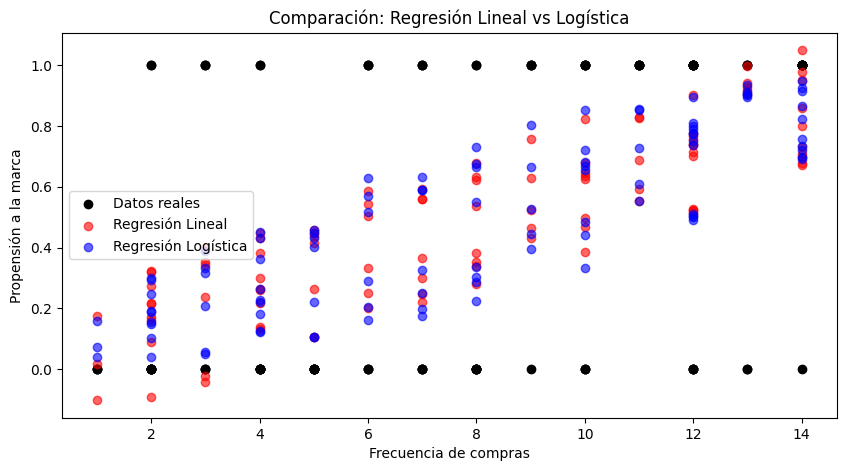

In [ ]:
# 2. Regresión Lineal
X = df[["frecuencia_compras", "gasto_mensual"]]
y = df["elige_marca"]

linear_model = LinearRegression().fit(X, y)
df["pred_lineal"] = linear_model.predict(X)

# 3. Regresión Logística
logit_model = LogisticRegression().fit(X, y)
df["pred_logistica"] = logit_model.predict_proba(X)[:, 1]

# 4. Comparación gráfica
plt.figure(figsize=(10,5))

plt.scatter(df["frecuencia_compras"], df["elige_marca"], c="black", label="Datos reales")
plt.scatter(df["frecuencia_compras"], df["pred_lineal"], c="red", alpha=0.6, label="Regresión Lineal")
plt.scatter(df["frecuencia_compras"], df["pred_logistica"], c="blue", alpha=0.6, label="Regresión Logística")

plt.xlabel("Frecuencia de compras")
plt.ylabel("Propensión a la marca")
plt.legend()
plt.title("Comparación: Regresión Lineal vs Logística")
plt.show()



* **Regresión lineal (rojo):** puede dar valores negativos o mayores a 1 (no sirven como probabilidades).
* **Regresión logística (azul):** ajusta en la curva S entre 0 y 1 → perfecto para interpretar como **propensión**.
* **Datos reales (negro):** puntos 0 o 1 (compró/no compró la marca).

### Conclusion! 
*"La regresión logística nos permite predecir probabilidades (propensión), mientras que la lineal no es la mejor opción en este caso."*
